# Installing packages

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.optimize import minimize
from scipy.stats.stats import pearsonr  
from scipy import stats
from sklearn.metrics import r2_score
from itertools import combinations
from urllib.request import urlopen
import urllib
import json
import numpy as np
import pandas as pd
from num2words import num2words
%load_ext rpy2.ipython

/var/folders/ww/jwc_dkyx4_58jw9lnh79r69r0000gn/T/ipykernel_1769/3654794994.py:7: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [8]:
%%R  -w 8 -h 3 #--units in -r 200
##installing packages and setting options for the plots in R

# {r settings, echo=F, message=F, error=F}
knitr::opts_chunk$set(echo = F)
if (!require("pacman")) install.packages("pacman")
pacman::p_load(ggplot2, patchwork, cowplot, tidyverse, devtools, ggrepel, ggh4x, officer, rvg, svglite, install = T)

# # Required on the first run, comment afterward?
devtools::install_github("BlakeRMills/MoMAColors")
library(MoMAColors)

theme_set(theme_cowplot() +
          theme(text = element_text(size=9),
                axis.text = element_text(size=9),
                panel.grid.major.x = element_blank() ,
                panel.grid.major.y = element_line( linewidth=.1, color="black")))

Loading required package: pacman
Skipping install of 'MoMAColors' from a github remote, the SHA1 (6f5d75de) has not changed since last install.
  Use `force = TRUE` to force installation


# Predictions on arabic numerals

### Using only log10

In [4]:
data = pd.read_csv('data_ngram_allLangsPerMilion.csv')
df = data[data.lang.isin(['en_arabic_numerals'])]
y = np.array(df['log_freq'])
X = np.array(df['log10'])
X = sm.add_constant(X)
numbers = [i+1 for i in range(99)]
# Fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
R2 = model.rsquared
preds = {
    'number':numbers,
    'log_freq': y,
    'predictions':predictions,
    'R2':[R2]*len(numbers)
}
df2 = pd.DataFrame(preds)
df2.to_csv('temp.csv')

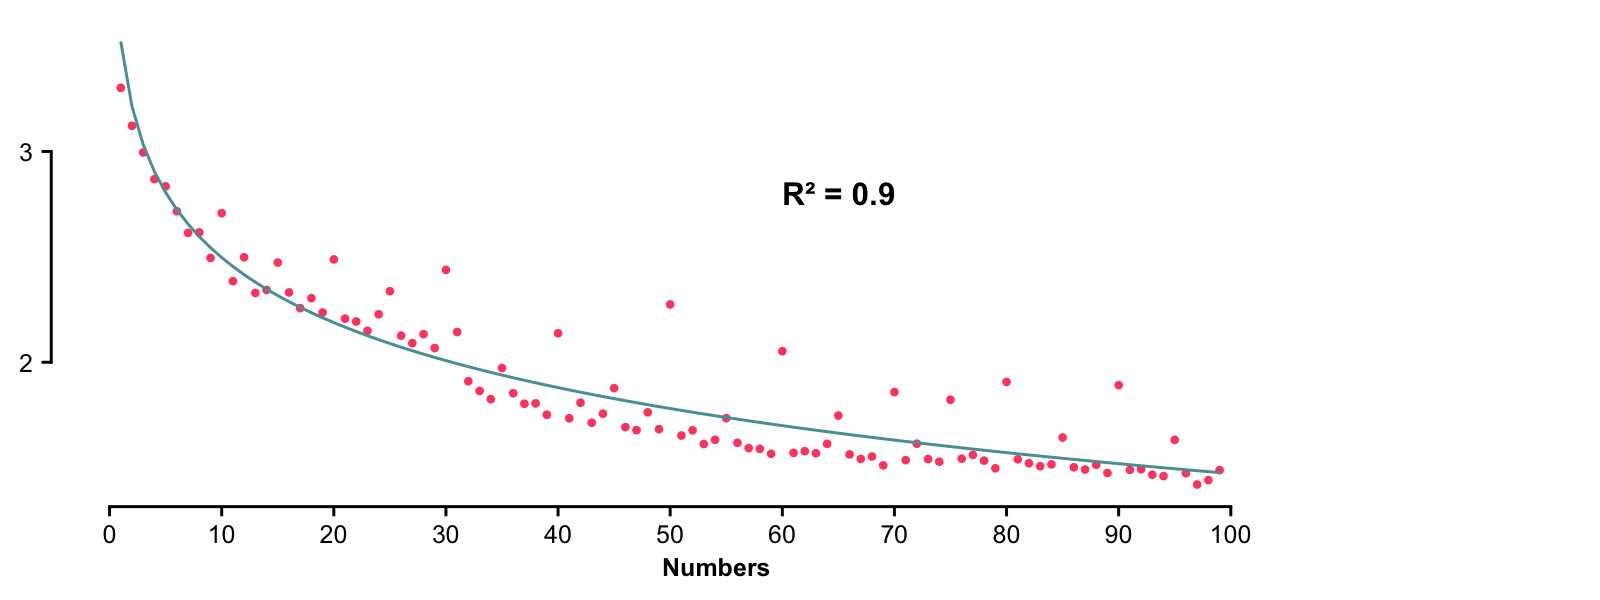

In [9]:
%%R  -w 8 -h 3 --units in -r 200
data <- read.csv('temp.csv')
R2 <- round(data$R2[1],2)
pl2 <- data %>%
    ggplot(aes(x = number)) +
    geom_point(aes(y = log_freq, color='line'),size=0.8) +
    geom_line(aes(y = predictions, color='point'), linewidth=0.5) +
    annotate("text", x = 60, y = 2.8, label = paste("R² =", R2), size = 4, hjust = 0, fontface = "bold") +

    theme(legend.position = "none",
        axis.title.y=element_blank(),
        panel.grid.major.y = element_blank(),
        axis.title.x = element_text(face="bold", size=9, hjust=0.43, family='Arial')) +
    labs(x = "Numbers") +
    scale_color_manual(values=moma.colors("Klein")) +
    xlim(1,125) +
    guides(x = guide_axis_manual(trunc_lower=0, trunc_upper=100, breaks=seq(0,100,10)),
            y = guide_axis_manual(trunc_lower=2, trunc_upper=3, breaks=c(2,3)))

pl2


In [10]:
data = pd.read_csv('data_ngram_allLangsPerMilion.csv')
df = data[data.lang.isin(['en_arabic_numerals'])]
y = np.array(df['log_freq'])
X = np.array(df[['log10', 'mult2', 'mult3','mult5', 'mult10']])
X = sm.add_constant(X)
numbers = [i+1 for i in range(99)]
# Fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
R2 = model.rsquared
print(model.summary())
preds = {
    'number':numbers,
    'log_freq': y,
    'predictions':predictions,
    'R2':[R2]*len(numbers)
}
df2 = pd.DataFrame(preds)
df2.to_csv('temp.csv')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     718.2
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           1.20e-72
Time:                        11:47:16   Log-Likelihood:                 124.67
No. Observations:                  99   AIC:                            -237.3
Df Residuals:                      93   BIC:                            -221.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4651      0.030    114.321      0.0

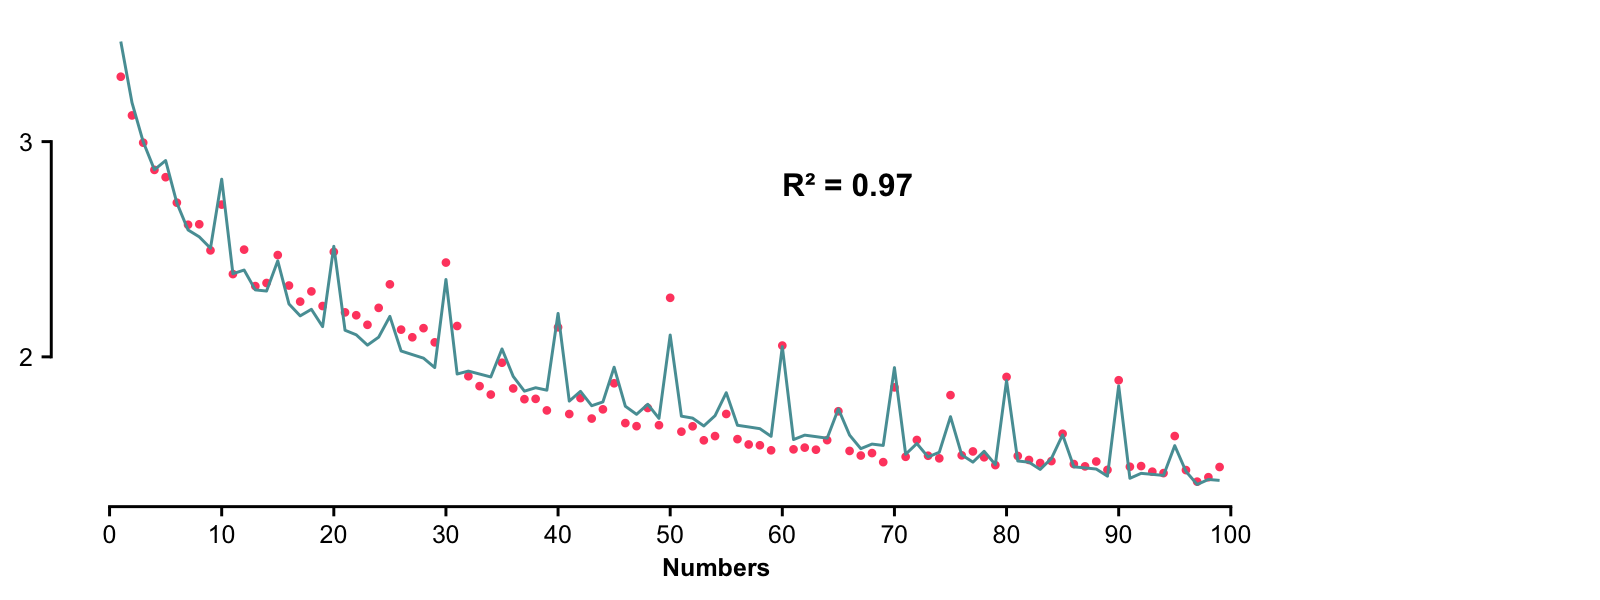

In [12]:
%%R  -w 8 -h 3 --units in -r 200
data <- read.csv('temp.csv')
R2 <- round(data$R2[1],2)
pl2 <- data %>%
    ggplot(aes(x = number)) +
    geom_point(aes(y = log_freq, color='line'),size=0.8) +
    geom_line(aes(y = predictions, color='point'), linewidth=0.5) +
    annotate("text", x = 60, y = 2.8, label = paste("R² =", R2), size = 4, hjust = 0, fontface = "bold") +

    theme(legend.position = "none",
        axis.title.y=element_blank(),
        panel.grid.major.y = element_blank(),
        axis.title.x = element_text(face="bold", size=9, hjust=0.43, family='Arial')) +
    labs(x = "Numbers") +
    scale_color_manual(values=moma.colors("Klein")) +
    xlim(1,125) +
    guides(x = guide_axis_manual(trunc_lower=0, trunc_upper=100, breaks=seq(0,100,10)),
            y = guide_axis_manual(trunc_lower=2, trunc_upper=3, breaks=c(2,3)))

pl2


# Testing with "exactly" and "about"

In [21]:
data = pd.read_csv('data_ngram_allLangsPerMilion.csv')


In [29]:
data

,Unnamed: 0,number,lang,word,mean_freq,matched_word,mean_dash_freq,has_dash,mean_total_freq,corrected_total_freq,...,mult7,mult5,mult3,mult2,exp2,exp3,exp5,exp7,exp10,log10
0,0,1,en,one,1572.145498,one,0.0,False,1572.145498,1565.268513,...,0,0,0,0,0,0,0,0,0,0.000000
1,1,2,en,two,906.184978,two,0.0,False,906.184978,899.070991,...,0,0,0,1,1,0,0,0,0,0.301030
2,2,3,en,three,441.677907,three,0.0,False,441.677907,436.484044,...,0,0,1,0,0,1,0,0,0,0.477121
3,3,4,en,four,235.432872,four,0.0,False,235.432872,227.026417,...,0,0,0,1,2,0,0,0,0,0.602060
4,4,5,en,five,191.527712,five,0.0,False,191.527712,173.590005,...,0,1,0,0,0,0,1,0,0,0.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,94,95,en_arabic_numerals,NaN,42.857666,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,1,0,0,1.977724
782,95,96,en_arabic_numerals,NaN,29.777152,NaN,NaN,NaN,NaN,NaN,...,0,0,1,1,5,1,0,0,0,1.982271
783,96,97,en_arabic_numerals,NaN,26.314659,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1.986772
784,97,98,en_arabic_numerals,NaN,27.599531,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,1,0,0,2,0,1.991226


In [25]:
data.columns

Index(['Unnamed: 0', 'number', 'lang', 'word', 'mean_freq', 'matched_word',
       'mean_dash_freq', 'has_dash', 'mean_total_freq', 'corrected_total_freq',
       'about_word', 'exactly_word', 'mean_freq_about', 'mean_freq_exactly',
       'log_freq_about', 'log_freq_exactly', 'log_freq',
       'log_freq_uncorrected', 'arabic_number', 'mult10', 'mult7', 'mult5',
       'mult3', 'mult2', 'exp2', 'exp3', 'exp5', 'exp7', 'exp10', 'log10'],
      dtype='object')

<Axes: >

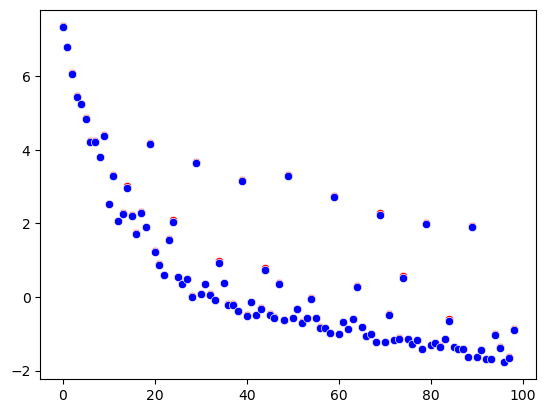

In [31]:
a = np.array(data['mean_total_freq'][:99])
b = np.array(data['mean_freq_about'][:99])
sns.scatterplot(np.log(a), c='r')
sns.scatterplot(np.log(a-b), c='b')


0      11.172026
1       6.756712
2       5.037522
3       2.724083
4       2.833545
         ...    
781     1.000000
782     1.000000
783     1.000000
784     1.000000
785     1.000000
Name: mean_freq_about, Length: 786, dtype: float64

In [17]:
def get_list_from_ngram(words, lang="en", year_start=1950, year_end=2000):
  """
  Given a list of words, get the data from google ngram, parse it as json,
  and return the python object. We ask for the whole list at once to avoid
  the "too many requests" issues
  """
  request = ",".join(words)
  request = urllib.parse.quote_plus(request)
  url = f"https://books.google.com/ngrams/json?content={request}&year_start={year_start}&year_end={year_end}&corpus={lang}-2019&smoothing=0"
  return json.loads(urlopen(url).read())

In [18]:
def populate_one_lang(lang, min=1, max=100):
  # Generate word list, then fetch data for each word
  numbers = list(range(min, max))
  if lang == "fr":
    # Damned be French with its _four words_ expression for these numbers!
    numbers.remove(97)
    numbers.remove(98)
    numbers.remove(99)
  data = pd.DataFrame({"number": numbers})
  data["lang"] = lang
  data["about_word"] = ["about " + num2words(number, lang=lang) for number in data["number"]]
  data["exactly_word"] = ["exactly " + num2words(number, lang=lang) for number in data["number"]]
   
  # Fetch NGRAM data
  replies_about = get_list_from_ngram(data["about_word"], lang=lang)
  replies_exactly = get_list_from_ngram(data["exactly_word"], lang=lang)

  # Read through json and extract avg. freq, as well as the word that NGRAM
  # gives us a value for (e.g. "forty-two" gets normalized on their end as
  # "forty - two")
  # Also turn frequency into per nb of occurence per million: x 1000000
  data["mean_freq_about"] = [1000000*np.mean(reply["timeseries"]) for reply in replies_about]
  data["mean_freq_exactly"] = [1000000*np.mean(reply["timeseries"]) for reply in replies_exactly]



  
  # Do both possibilities for vizualisation later, default is corrected
  data["log_freq_about"] = np.log10(data["mean_freq_about"])
  data["log_freq_exactly"] = np.log10(data["mean_freq_exactly"])

   
  return data

In [19]:
data = populate_one_lang('en')

In [20]:
data['corrected_freq'] = data['mean']

,number,lang,about_word,exactly_word,mean_freq_about,mean_freq_exactly,log_freq_about,log_freq_exactly
0,1,en,about one,exactly one,11.172026,0.622543,1.048132,-0.205831
1,2,en,about two,exactly two,6.756712,0.175019,0.829735,-0.756914
2,3,en,about three,exactly three,5.037522,0.090150,0.702217,-1.045034
3,4,en,about four,exactly four,2.724083,0.051015,0.435220,-1.292304
4,5,en,about five,exactly five,2.833545,0.043515,0.452330,-1.361356
...,...,...,...,...,...,...,...,...
94,95,en,about ninety-five,exactly ninety-five,0.009119,0.000087,-2.040070,-4.061967
95,96,en,about ninety-six,exactly ninety-six,0.002252,0.000090,-2.647356,-4.045163
96,97,en,about ninety-seven,exactly ninety-seven,0.001323,0.000051,-2.878292,-4.288677
97,98,en,about ninety-eight,exactly ninety-eight,0.002316,0.000146,-2.635243,-3.836913


<Axes: >

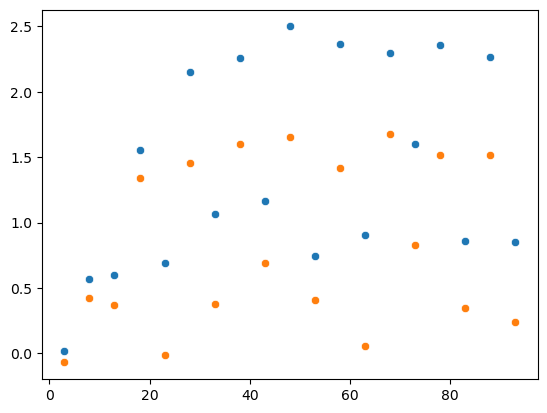

In [40]:
about = np.array(data["log_freq_about"])
exactly = np.array(data["log_freq_exactly"])

diff_about = about[1:]-about[:-1]

diff_exactly = exactly[1:]-exactly[:-1]


fives = [5*i +3 for i in range(19)]
sns.scatterplot(x = fives, y = diff_about[fives])

sns.scatterplot(x = fives, y = diff_exactly[fives])


In [12]:
data.to_csv('temp.csv')

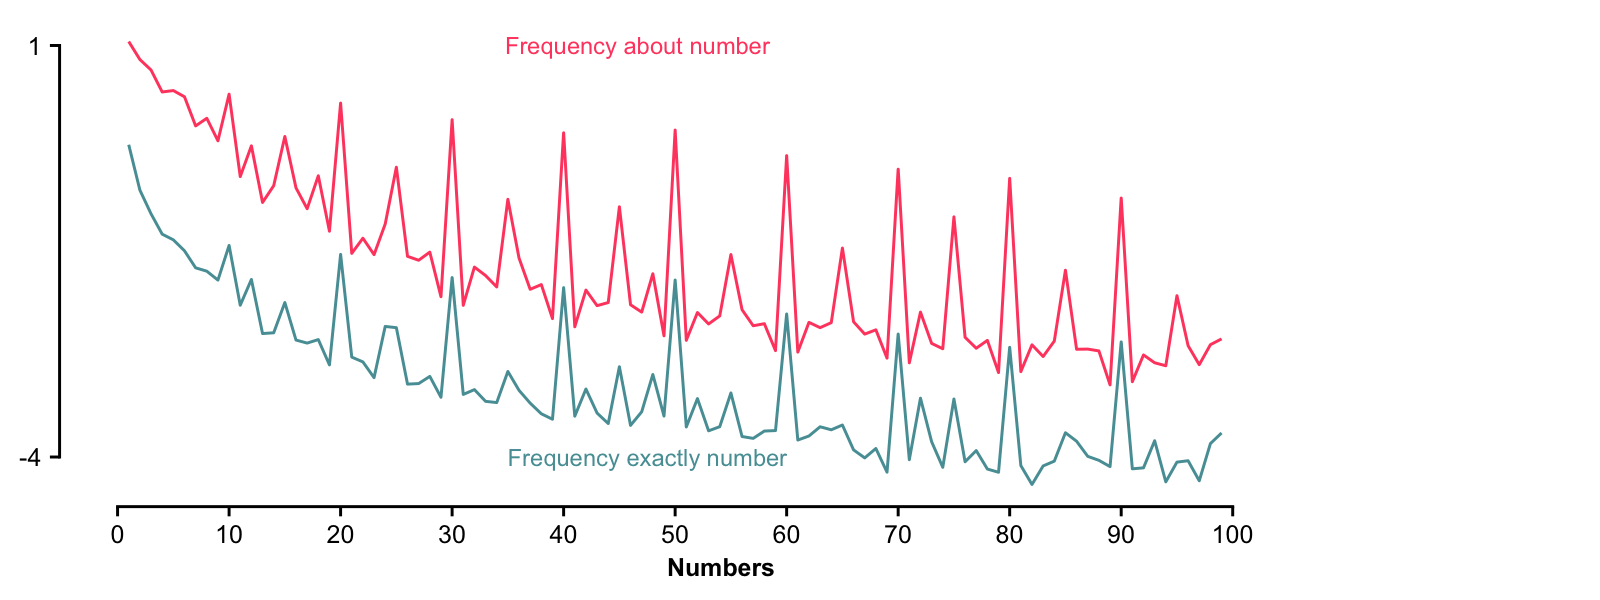

In [18]:
%%R  -w 8 -h 3 --units in -r 200

plsup1 <- read.csv('temp.csv') %>%
    ggplot(aes(x = number)) +
    geom_line(aes(y = log_freq_about, color='line'),linewidth=0.5) +


    geom_line(
    aes(y = log_freq_exactly, color='point'), linewidth=0.5) +
    geom_text(data = . %>% filter(number == 30), 
            aes(x = number, y = 1, label = 'Frequency about number', color = 'line'), 
            hjust = -0.2, size = 3) +   # Label for first line
    geom_text(data = . %>% filter(number == 30), 
            aes(x = number, y = -4, label = 'Frequency exactly number', color = 'point'), 
            hjust = -0.2, size = 3) +   # Label for second line
    theme(legend.position = "none",
            axis.title.y=element_blank(),
            panel.grid.major.y = element_blank(),
            axis.title.x = element_text(face="bold", size=9, hjust=0.43, family='Arial')) +
    labs(x = "Numbers") +
    scale_color_manual(values=moma.colors("Klein")) +
    xlim(1,125) +
    guides(x = guide_axis_manual(trunc_lower=0, trunc_upper=100, breaks=seq(0,100,10)),
            y = guide_axis_manual(trunc_lower=-4, trunc_upper=1, breaks=c(-4,1)))


# ggsave("plots/S1_corrected_vs_uncorrected_option1.svg", plsup1, device='svg',width = 8, height = 3, units = "in")

plsup1

# MDL if multiplication is as complex as addition

In [5]:
import numpy as np
mdl = np.ones(100)*np.inf
mdl[1] = 0    
for i in range(1,100):
    if mdl[i]==np.inf:
        for j in range(1,i//2 +1):
            mdl[i] = min(mdl[i], mdl[j] + mdl[i-j] + 1)
        for j in range(2, int(np.sqrt(i))+1):
            if i%j==0:
                mdl[i] = min(mdl[i], mdl[j] + mdl[i//j] + 1)
(mdl[1:100])



array([ 0.,  1.,  2.,  3.,  4.,  4.,  5.,  5.,  5.,  6.,  7.,  6.,  7.,
        7.,  7.,  7.,  8.,  7.,  8.,  8.,  8.,  9., 10.,  8.,  9.,  9.,
        8.,  9., 10.,  9., 10.,  9., 10., 10., 10.,  9., 10., 10., 10.,
       10., 11., 10., 11., 11., 10., 11., 12., 10., 11., 11., 11., 11.,
       12., 10., 11., 11., 11., 12., 13., 11., 12., 12., 11., 11., 12.,
       12., 13., 12., 13., 12., 13., 11., 12., 12., 12., 12., 13., 12.,
       13., 12., 11., 12., 13., 12., 13., 13., 13., 13., 14., 12., 13.,
       13., 13., 14., 13., 12., 13., 13., 13.])

# Fitting on the first 9 numbers

In [14]:
def get_probs_max(add_cost, mult_cost, f1):
    number_probs = np.zeros(100)
    number_probs[0]=1
    number_probs[1] = f1    
    for i in range(1,100):
        if number_probs[i]==0:
            for j in range(1,i//2 +1):
                number_probs[i] = max(number_probs[i],number_probs[j]*number_probs[i-j]*add_cost) 
            for j in range(2, int(np.sqrt(i))+1):
                if i%j==0:
                    number_probs[i]= max(number_probs[i],number_probs[j]*number_probs[i//j]*mult_cost)
    return np.log10(number_probs[1:100])

def loss_function(params, target_vector):
    add_cost, mult_cost, f1 = params
    predictions = get_probs_max(add_cost, mult_cost, f1)
    first_9 = [i for i in range(10)]
    predictions, target_vector = predictions[first_9], target_vector[first_9]
    return np.sum((predictions - target_vector) ** 2)

In [15]:
data = pd.read_csv('data_ngram_allLangsPerMilion.csv')

df = data[data.lang.isin(['en'])]
target = np.array(df['log_freq'])
freqs = df.corrected_total_freq
## we define the initial guess for the optimization as what would be 
##the parameters accounting for the first few numbers
## so that the initial guess is in the right neigborhood
initial_guess = [freqs[1]/freqs[0]/freqs[0], freqs[5]/freqs[1]/freqs[2], freqs[0]]
##            = freq(2)/freq(1)^2             , freq(6)/(freq(2)*freq(3))    , freq(1)   
print(f'Inital guess: {initial_guess}')
result = minimize(loss_function, initial_guess, args=(target,), method = 'Nelder-Mead')
best_params = result.x

print("Optimized Parameters:", best_params)
predictions = get_probs_max(*best_params)
R2 = (r2_score(predictions,df.log_freq))
print(f'R2 = {R2}')

numbers = [i+1 for i in range(99)]
preds = {
    'numbers':numbers,
    'log_freq': df.log_freq,
    'predictions':predictions,
    'R2':[R2]*len(numbers)

}
df2 = pd.DataFrame(preds)
df2.to_csv('temp.csv')


Inital guess: [0.0003669579382946686, 0.0003186047933210102, 1565.2685127018156]
Optimized Parameters: [4.48562796e-04 3.13761638e-04 1.33162309e+03]
R2 = 0.65178901759534


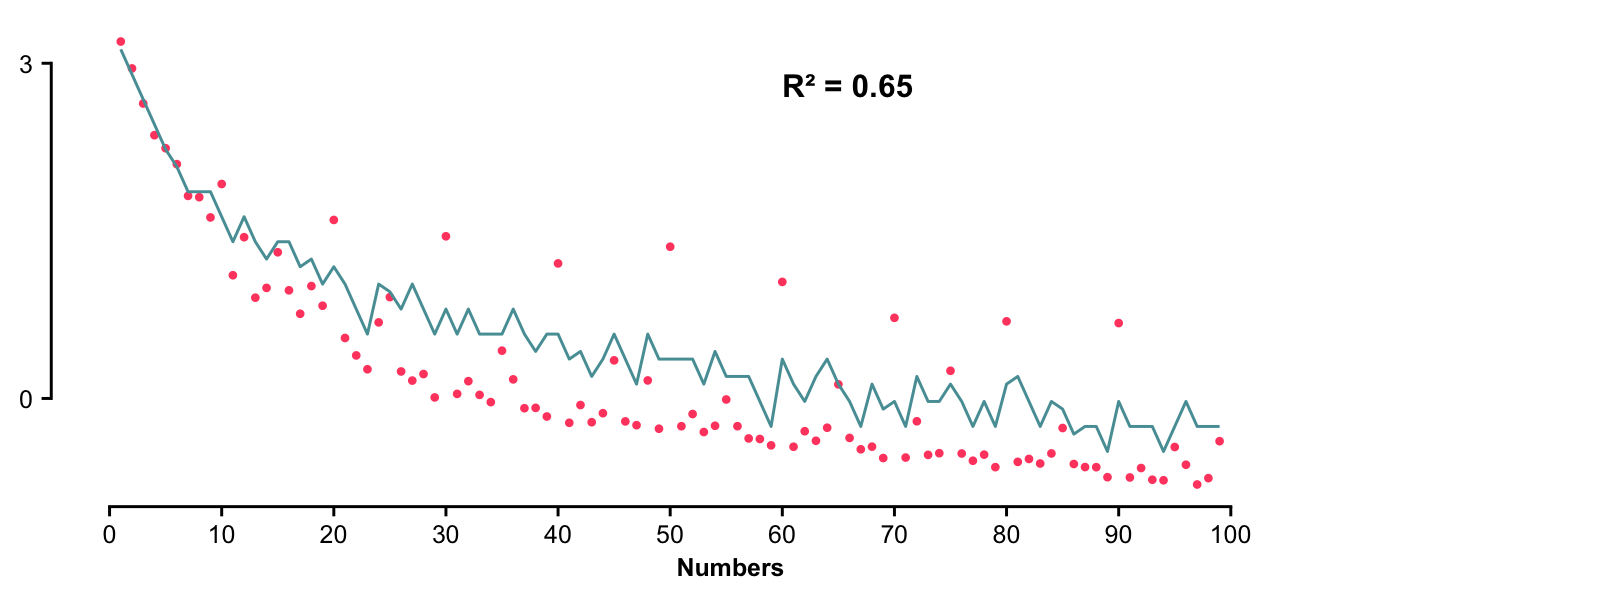

In [16]:
%%R -w 8 -h 3 --units in -r 200 

data <- read.csv('temp.csv')
R2 <- round(data$R2[1],2)
pl_model <- data %>%
    ggplot(aes(x = numbers)) +
    geom_point(aes(y = log_freq, color='line'),size=0.8) +
    geom_line(aes(y = predictions, color='point'), linewidth=0.5) +
    annotate("text", x = 60, y = 2.8, label = paste("R² =", R2), size = 4, hjust = 0, fontface = "bold") +
    theme(legend.position = "none",
            axis.title.y=element_blank(),
            panel.grid.major.y = element_blank(),
            axis.title.x = element_text(face="bold", size=9, hjust=0.44, family='Arial')) +
    labs(x = "Numbers") +
    scale_color_manual(values=moma.colors("Klein")) +
    xlim(1,125) +
    guides(x = guide_axis_manual(trunc_lower=0, trunc_upper=100, breaks=seq(0,100,10)),
            y = guide_axis_manual(trunc_lower=0, trunc_upper=3, breaks=c(0,3)))

# ggsave("plots/3A_model_english.svg", pl_model, device='svg',width = 8, height = 3, units = "in")
pl_model